In [151]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
class BeamParameters():

    def __init__(self, l, a, E, b, h, G) -> None:
        self.l = l
        self.a = a
        self.b = b
        self.h = h
        self.G = G

        I = b*h**3/12
        self.EI = E * I

beam = BeamParameters(4, 1.5, 14e6, 0.5, 0.05, 80*9.81)

In [153]:
def w1(beam: BeamParameters, x1: np.array) -> np.array:
    return beam.G * (beam.l/beam.a - 1) / (6 * beam.EI) * (x1**3 - beam.a**2 * x1)

def w2(beam: BeamParameters, x2: np.array) -> np.array:
    x2 = x2 - beam.a
    return beam.G / (6 * beam.EI) * (2*(beam.l*beam.a - beam.a**2)*x2 + 3*(beam.l - beam.a)*x2**2 - x2**3)

def w_fun(beam: BeamParameters, x: np.array) -> np.array:
    w1_indices = np.logical_and(x >= 0, x < beam.a)
    w2_indices = np.logical_and(x >= beam.a, x <= beam.l)
    
    w1_values = w1(beam, x[w1_indices])
    w2_values = w2(beam, x[w2_indices])
    return np.concatenate((w1_values, w2_values))

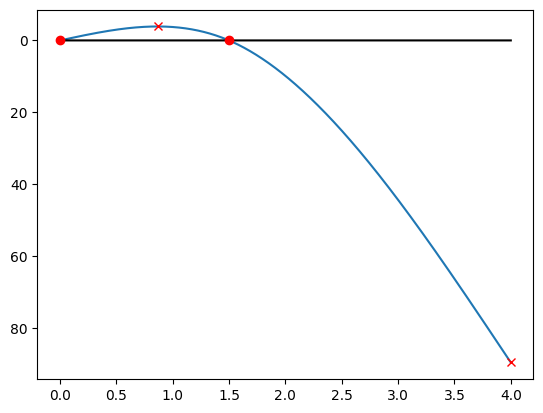

In [154]:
x = np.linspace(0, beam.l, 10000)
w = w_fun(beam, x)

def plot_deflection(x: np.array, w: np.array, beam: BeamParameters):
    max_index_left = np.argmax(np.abs(w[x < beam.a]))
    sub_index = np.argmax(np.abs(w[x >= beam.a]))
    max_index_right = np.arange(w.shape[0])[x >= beam.a][sub_index]

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(x, w)
    ax.plot(x, np.zeros_like(x), 'k-')
    ax.plot(0, 0, 'ro')
    ax.plot(beam.a, 0, 'ro')
    ax.plot(x[max_index_left], w[max_index_left], 'rx')
    ax.plot(x[max_index_right], w[max_index_right], 'rx')
    ax.invert_yaxis()

plot_deflection(x, w, beam)

k_min_a = 13.671875000000004
k_max_a = 54.687500000000014


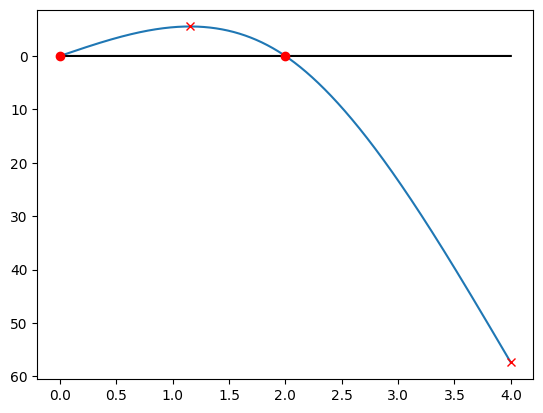

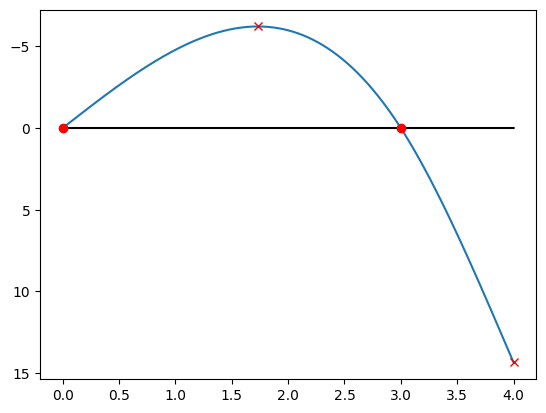

In [155]:
import copy

beam_min_a = copy.copy(beam)
beam_min_a.a = 2

beam_max_a = copy.copy(beam)
beam_max_a.a = 3

w_min_a = w_fun(beam_min_a, x)
w_max_a = w_fun(beam_max_a, x)

plot_deflection(x, w_min_a, beam_min_a)
plot_deflection(x, w_max_a, beam_max_a)

k_min_a = beam_min_a.G / w_min_a[-1]
k_max_a = beam_max_a.G / w_max_a[-1]

print(f"k_min_a = {k_min_a}")
print(f"k_max_a = {k_max_a}")

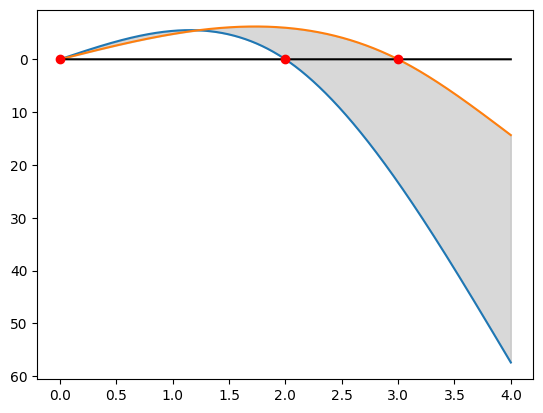

In [156]:
fig = plt.figure()
ax = fig.add_subplot()
ax.fill_between(x, w_min_a,  w_max_a, color='gray', alpha=0.3)
ax.plot(x, w_min_a)
ax.plot(x, w_max_a)
ax.plot(x, np.zeros_like(x), 'k-')
ax.plot(0, 0, 'ro')
ax.plot(beam_min_a.a, 0, 'ro')
ax.plot(beam_max_a.a, 0, 'ro')
ax.invert_yaxis()